In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from datetime import datetime

In [2]:
print(os.getcwd())
print(os.listdir())

/Users/sorennonnengart/Dev/Python/climate
['.DS_Store', '.ipynb_checkpoints', 'data', 'Climatechange_research.ipynb']


In [3]:
# import dataset
df = pd.read_csv('data/GlobalTemperatures.csv')
# df.head()

In [4]:
# creating an array with 2 variables 
df = df[['dt', 'LandAverageTemperature']]
# df.head(10)

In [5]:
# formatting as datetime 
df["dt"] = pd.to_datetime(df["dt"])
# df.head(20)

In [6]:
# creating a variable "year"
df['year'] = pd.Series([datetime.year for datetime in df['dt']])
# df['year']
# df.head()
first_year = df['year'].min()
last_year = df['year'].max()
years = np.arange(first_year, last_year + 1)
# print(years)

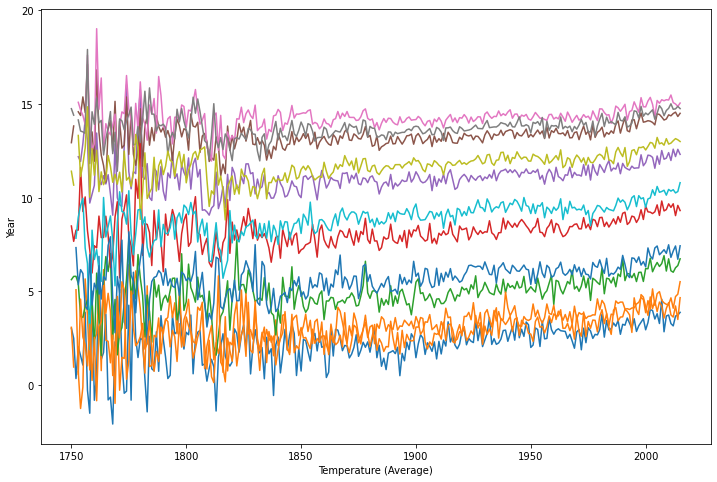

In [7]:
# preparing the data for plotting
temp = []
for year in years:
    current_year = df[df['year'] == year] 
    temp.append(current_year['LandAverageTemperature'])

# plt.plot for 12 different average temperatures per year (January - December)
A, ax = plt.subplots(figsize = (12,8))
plt.plot(years, temp)
ax.set_xlabel("Temperature (Average)")
ax.set_ylabel("Year")
plt.show()

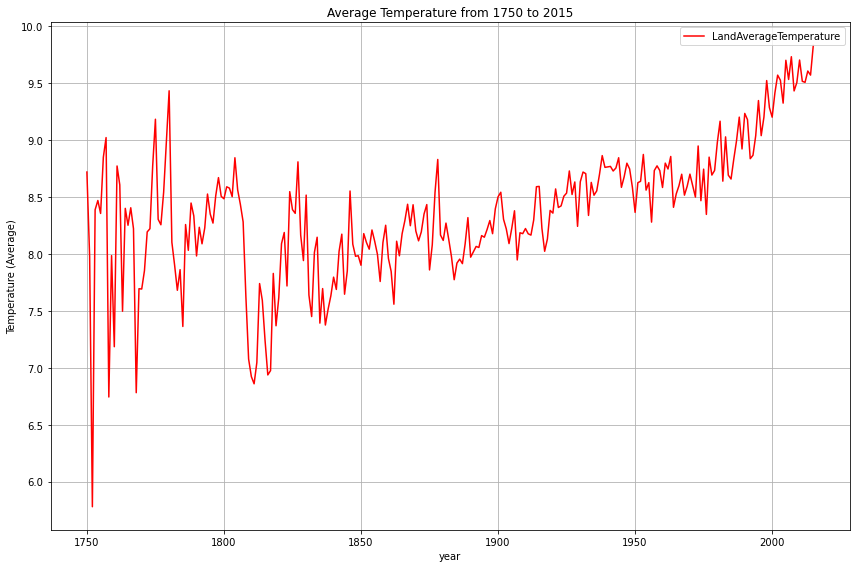

In [8]:
# plt.plot Mean values of temperatures over the 12 months per year
temp = []
for year in years:
    current_year = df[df['year'] == year] 
    temp.append(current_year['LandAverageTemperature'].mean())  # with mean

# plot
A, ax = plt.subplots(figsize = (12,8))
plt.plot(years, temp, color='r', label="LandAverageTemperature")
ax.set_xlabel("year")
ax.set_ylabel("Temperature (Average)")
plt.title("Average Temperature from 1750 to 2015")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [9]:
df['month'] = pd.Series([datetime.month for datetime in df['dt']])
df.head(15)

def which_season(month):
    if month>=3 and month<=5:
        return 'Spring'
    elif month>=6 and month<=8:
        return 'Summer'
    elif month>=9 and month<=11:
        return 'Autumn'
    return 'Winter'
    
df['season'] = df['month'].apply(which_season)
# df

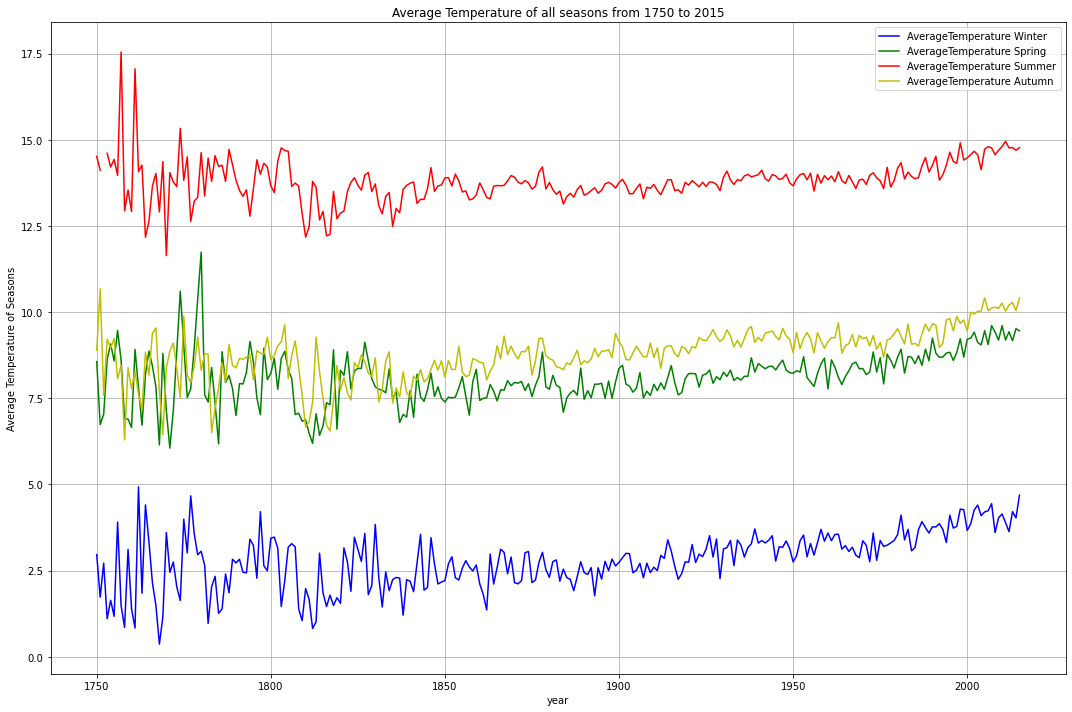

In [14]:
# Differentiation based on the seasons
temps_winter = []
temps_spring = []
temps_summer = []
temps_autumn = []


for year in years:
    current_year = df[df['year'] == year] 
    temps_winter.append(current_year[current_year['season'] == 'Winter']['LandAverageTemperature'].mean())  
    temps_spring.append(current_year[current_year['season'] == 'Spring']['LandAverageTemperature'].mean()) 
    temps_summer.append(current_year[current_year['season'] == 'Summer']['LandAverageTemperature'].mean()) 
    temps_autumn.append(current_year[current_year['season'] == 'Autumn']['LandAverageTemperature'].mean()) 
    
# plot
A, ax = plt.subplots(figsize = (15,10))
plt.plot(years, temps_winter, label="AverageTemperature Winter", color="b")
plt.plot(years, temps_spring, label="AverageTemperature Spring", color="g")
plt.plot(years, temps_summer, label="AverageTemperature Summer", color="r")
plt.plot(years, temps_autumn, label="AverageTemperature Autumn", color="y")
ax.set_ylabel("Average Temperature of Seasons")
ax.set_xlabel("year")
plt.title("Average Temperature of all seasons from 1750 to 2015")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()